In [2]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib
#!pip install dlib
from imutils import face_utils

In [3]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['Untitled', 'img', 'models', '27.ipynb', '30.ipynb']

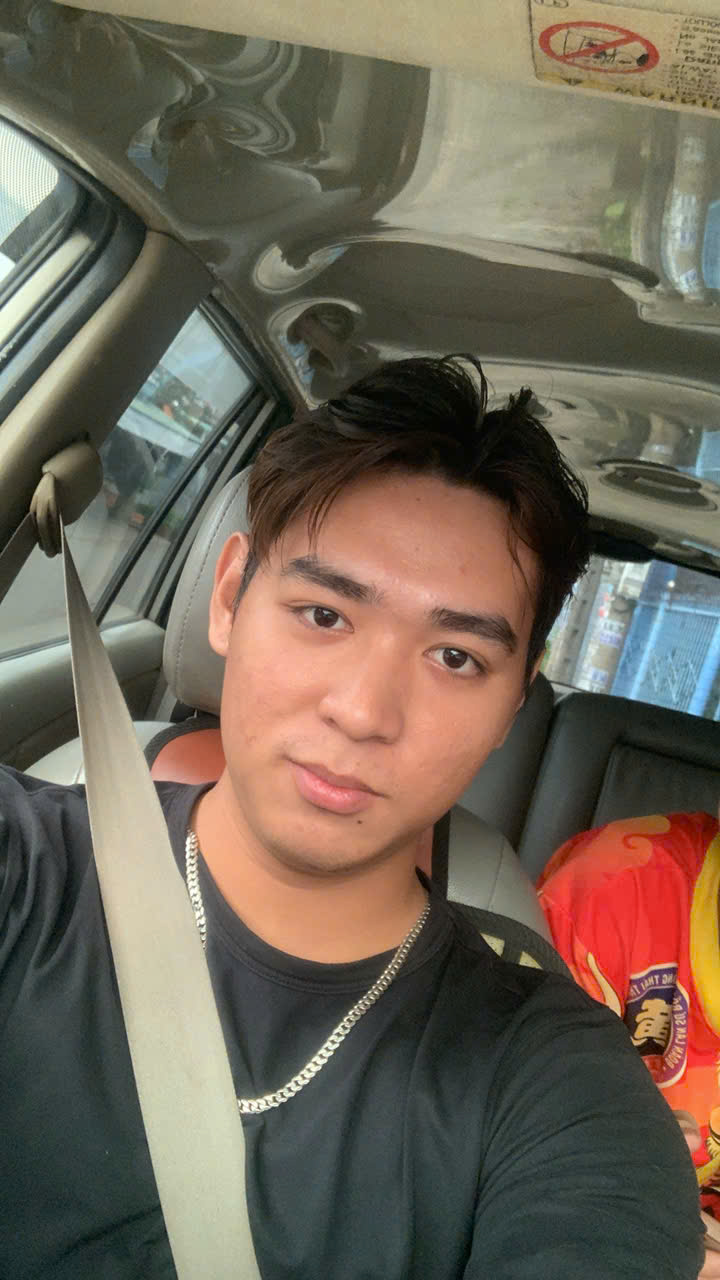

In [5]:
img = cv2.imread(path + "/img/face.jpg")
cv2_imshow(img)

In [11]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/img/face.jpg"
print(img_path)

/content/drive/MyDrive/Colab Notebooks/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/Colab Notebooks/models/dlib_face_recognition_resnet_model_v1.dat
/content/drive/MyDrive/Colab Notebooks/img/face.jpg


-0.0677813
0.110589
-0.00284871
0.0211342
-0.0271733
-0.0399105
-0.063874
-0.121363
0.113
0.0121382
0.171623
-0.0681095
-0.222239
-0.0898006
-0.049651
0.168171
-0.138021
-0.131706
-0.0179103
0.0224093
0.104996
-0.0423358
-0.0262739
0.0721565
-0.108497
-0.258461
-0.0855774
-0.0797431
-0.0281768
-0.0466339
-0.115973
0.0146512
-0.193801
-0.102503
0.0833391
0.100392
0.0228287
-0.0208851
0.168942
0.00444983
-0.215201
0.0153384
0.101902
0.228937
0.195003
0.11378
-0.0554454
-0.13458
0.127856
-0.176726
0.145739
0.141338
0.129558
0.0913931
-0.030439
-0.161637
0.0150214
0.123744
-0.201061
0.0266182
0.07757
-0.0857948
-0.0826923
-0.0943878
0.198757
0.149012
-0.100534
-0.201134
0.127424
-0.170445
-0.112389
0.040631
-0.104281
-0.164362
-0.359428
0.0248881
0.350752
0.118448
-0.25868
0.0257155
-0.0297394
0.00209036
0.143744
0.104
-0.00200163
0.0256915
-0.0820828
-0.0866673
0.218628
-0.0303348
-0.0466885
0.192352
-0.0267463
0.0660831
0.0417539
0.0507802
-0.0379239
0.00799916
-0.17757
-0.0937223
0.0464

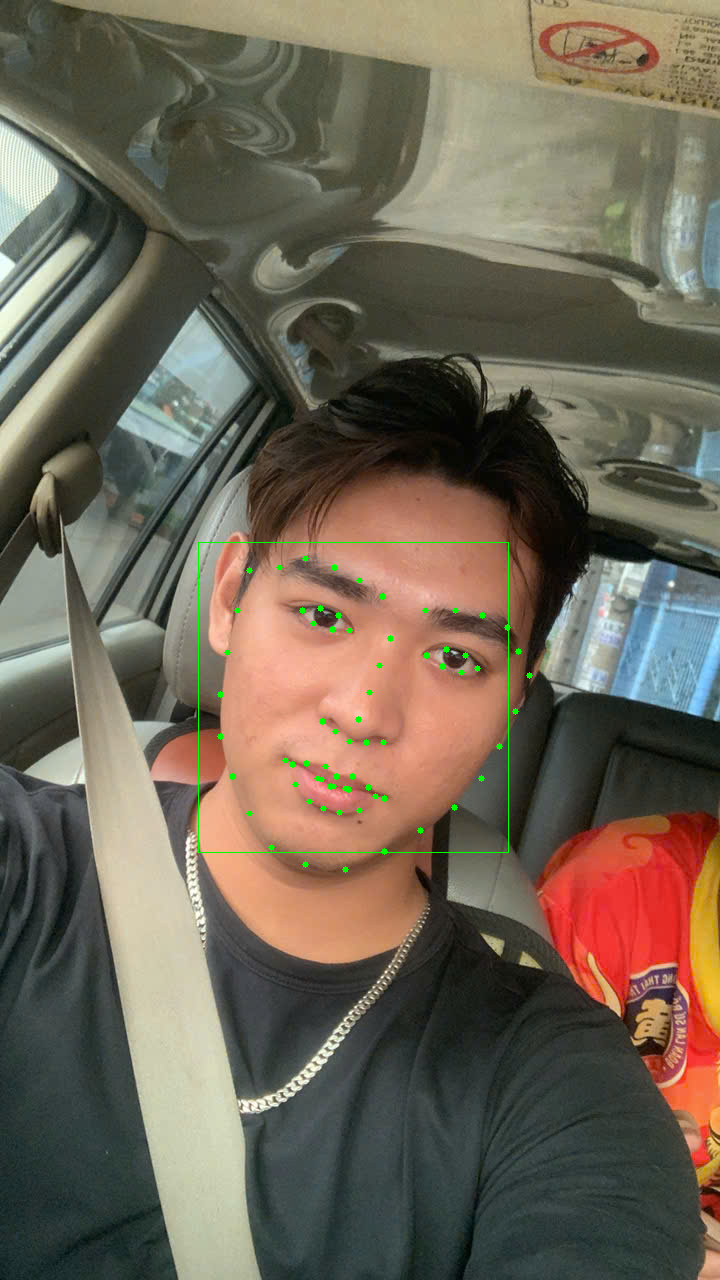

In [13]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
img_path = path+  "/img/face.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)